In [2]:
import numpy as np
import pandas as pd 
import datetime

In [2]:
master_df = pd.read_csv('./data_2011-2013_PL.csv')

In [3]:
pd.set_option('display.max_columns', 22)
master_df.head(1)

,Unnamed: 0,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,headline,keywords,pub_date,document_type,news_desk,section_name,byline,type_of_material,_id,word_count,uri,subsection_name
0,0,Judge Edward R. Korman of the Eastern District...,https://www.nytimes.com/2014/01/01/business/ju...,Judge Edward R. Korman of the Eastern District...,The government’s right to search travelers’ el...,B,3.0,The New York Times,"[{'rank': 0, 'subtype': 'wide', 'caption': Non...",{'main': 'District Judge Upholds Government’s ...,"[{'name': 'subject', 'value': 'Search and Seiz...",2013-12-31 23:48:51+00:00,article,Business,Business Day,"{'original': 'By Susan Stellin', 'person': [{'...",News,nyt://article/2b1e823c-a372-5db3-ae95-86f20e4a...,741,nyt://article/2b1e823c-a372-5db3-ae95-86f20e4a...,NaN


In [4]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        16800 non-null  int64  
 1   abstract          16800 non-null  object 
 2   web_url           16800 non-null  object 
 3   snippet           16800 non-null  object 
 4   lead_paragraph    16783 non-null  object 
 5   print_section     13467 non-null  object 
 6   print_page        13467 non-null  float64
 7   source            16800 non-null  object 
 8   multimedia        16800 non-null  object 
 9   headline          16800 non-null  object 
 10  keywords          16800 non-null  object 
 11  pub_date          16800 non-null  object 
 12  document_type     16800 non-null  object 
 13  news_desk         16800 non-null  object 
 14  section_name      16800 non-null  object 
 15  byline            16800 non-null  object 
 16  type_of_material  16800 non-null  object

In [5]:
master_df.isnull().sum()

Unnamed: 0             0
abstract               0
web_url                0
snippet                0
lead_paragraph        17
print_section       3333
print_page          3333
source                 0
multimedia             0
headline               0
keywords               0
pub_date               0
document_type          0
news_desk              0
section_name           0
byline                 0
type_of_material       0
_id                    0
word_count             0
uri                    0
subsection_name     7366
dtype: int64

# Planned Deletions

Planning to delete subsection name. Nearly half do not have a value for that.
Definitely a large portion of duplicates that need to be dropped in snippet and lead paragraph. Not sure best way to go about dropping those that are true duplicates and ones that may still have some info.
Headline may have some value since it is the first thing someone sees, need to figure out way to extract that text
Leaning towards deleting byline. Not sure any info in there could add to our sentiment analysis, possibly keep to have author, maybe we'll see some authors have a greater impact?


At end should check average articles per day.
Reindex

In [6]:
master_df.head(1)

,Unnamed: 0,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,headline,keywords,pub_date,document_type,news_desk,section_name,byline,type_of_material,_id,word_count,uri,subsection_name
0,0,Judge Edward R. Korman of the Eastern District...,https://www.nytimes.com/2014/01/01/business/ju...,Judge Edward R. Korman of the Eastern District...,The government’s right to search travelers’ el...,B,3.0,The New York Times,"[{'rank': 0, 'subtype': 'wide', 'caption': Non...",{'main': 'District Judge Upholds Government’s ...,"[{'name': 'subject', 'value': 'Search and Seiz...",2013-12-31 23:48:51+00:00,article,Business,Business Day,"{'original': 'By Susan Stellin', 'person': [{'...",News,nyt://article/2b1e823c-a372-5db3-ae95-86f20e4a...,741,nyt://article/2b1e823c-a372-5db3-ae95-86f20e4a...,NaN


In [8]:
#stop, no run this cell
#delete duplicates
#web url has 200 duplicates
master_df.drop_duplicates(['web_url'],inplace=True)

#Planned deletions
#Unnamed is another index, subsection name has too many na's and no relevant info, _id and uri are unique vals but already have web_url, all articles are from news_desk business, all articles are document_type article, keywords is just words with no sentimental words to improve model, multimedia is pics or vids in article that add nothing, source contains info stating NYT or Herald tribune,print_page indicates whether news was printed, print_section indicates what section it was printed in 
master_df.drop(['Unnamed: 0','subsection_name', '_id', 'uri', 'news_desk', 'document_type', 'keywords', 'multimedia', 'source', 'print_page', 'print_section', 'type_of_material',  'word_count'], axis =1, inplace=True)

#drop all these rows
#not dropping duplicates of abstract because there are duplicate abstract titles with unique lead_paragraphs. May need to fill it with empty cell?
master_df.drop(master_df.loc[master_df['abstract']=='Notable properties that have been recently listed for sale, sold or leased.'].index, inplace=True)
master_df.drop(master_df.loc[master_df['abstract']=='Account assignments, executive appointments and miscellaneous news from advertising agencies.'].index, inplace=True)
master_df.drop(master_df.loc[master_df['abstract']=='The following tax-exempt fixed-income issues are scheduled for pricing this week.'].index, inplace=True)
master_df.drop(master_df.loc[master_df['abstract']=='Account assignments, executive appointments and miscellaneous news from the advertising agencies.'].index, inplace=True)
master_df['abstract'] = master_df['abstract'].map(lambda x: "" if 'Highlights from the DealBook newsletter.' in x else x) #blankifying because relevant data in other sections even if this isn't relevant to sentiment
master_df['abstract'] = master_df['abstract'].map(lambda x: "" if 'Economic reports, corporate earnings and hearings this week in Washington.' in x else x)


master_df['snippet'] = master_df['snippet'].map(lambda x: "" if 'Highlights from the DealBook newsletter.' in x else x)

master_df.drop(master_df.loc[master_df['lead_paragraph'] == 'TOP STORIES'].index, inplace=True)

#alltext column creation
master_df['alltext'] = pd.DataFrame(master_df['abstract']+ master_df['lead_paragraph']+ master_df['snippet'])

# adding column for only date from datetime
master_df["Date"] = master_df["pub_date"].map(lambda x: x[0:10])

#setting index to date to merge with stock data
master_df.set_index('Date', inplace = True)
                

In [27]:
master_df['headline'][0]

"{'main': 'District Judge Upholds Government’s Right to Search Electronics at Border', 'kicker': None, 'content_kicker': None, 'print_headline': 'District Judge Upholds Government&#8217;s Right to Search Electronics at Border', 'name': None, 'seo': None, 'sub': None}"

In [ ]:
json.loads(master_df['headline'][0])

In [ ]:
master_df['abstract'].value_counts().head(20)

In [ ]:
master_df['lead_paragraph'].value_counts().head(20)

In [ ]:
master_df.loc[master_df['lead_paragraph']=='Q: (Reader)']

In [35]:
master_df.loc[master_df['abstract']=='Germany’s finance minister and the United States Treasury secretary expressed confidence in efforts to revamp euro zone economies.']

,abstract,web_url,snippet,lead_paragraph,headline,pub_date,section_name,byline,alltext
Date,,,,,,,,,
2012-07-31,Germany’s finance minister and the United Stat...,https://www.nytimes.com/2012/07/31/business/sp...,Germany’s finance minister and the United Stat...,LONDON — Borrowing costs for Spain and Italy e...,{'main': 'Pledges of Euro Support Ease Some Bo...,2012-07-31 04:00:47+00:00,Business Day,"{'original': 'By Stephen Castle', 'person': [{...",Germany’s finance minister and the United Stat...
2012-07-30,Germany’s finance minister and the United Stat...,https://www.nytimes.com/2012/07/31/business/gl...,Germany’s finance minister and the United Stat...,LONDON — Borrowing costs for Spain and Italy e...,{'main': 'Pledges of Euro Support Ease Some Bo...,2012-07-30 09:00:35+00:00,Business Day,"{'original': 'By Stephen Castle', 'person': [{...",Germany’s finance minister and the United Stat...


In [ ]:
master_df['subsection_name'].value_counts()

In [30]:
draft_df = pd.DataFrame(master_df['alltext'])

In [31]:
draft_df.head(1)

,alltext
Date,
2013-12-31,Judge Edward R. Korman of the Eastern District...


In [34]:
draft_df.isnull().sum()

alltext    17
dtype: int64

# Working off of Tanveer's Clean Data 

In [152]:
# to load file 
daily = pd.read_csv('/Users/plarkin/Downloads/daily.csv')
daily.head()

,Unnamed: 0,date,text,price,pct_change,price_direction,day_of_week,is_holiday
0,0,2011-07-29,"Drug App Comes Free, Ads Included. Epocrates h...",1292.28,NaN,first,4,0
1,1,2011-07-30,Global Concern Over U.S. Debt Ceiling Disagree...,1292.28,0.000000,same,5,0
2,2,2011-07-31,"Deal May Avert Default, but Some Ask, ‘Is That...",1292.28,0.000000,same,6,0
3,3,2011-08-01,"Charging a Premium for Movies, at a Cost. High...",1286.94,-0.004132,down,0,0
4,4,2011-08-02,"Pearls, Finer but Still Cheap, Flow From China...",1254.05,-0.025557,down,1,0


## Sentiment Analysis

In [153]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


# Imp ort CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text 

#tokenizers
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re



#### Vader Sentiment Analysis

In [154]:
#Adding in Sentiment analysis with designated columns for each output (pos, neg, neu, compound)
analyzer = SentimentIntensityAnalyzer()

#daily['vader'] = daily['text'].map(lambda x:analyzer.polarity_scores(str(x)))


daily['vader_compound'] = [analyzer.polarity_scores(x)['compound'] for x in daily['text']]
# draft_df['vd_neg'] = [analyzer.polarity_scores(x)['neg'] for x in draft_df['alltext']]
# draft_df['vd_neu'] = [analyzer.polarity_scores(x)['neu'] for x in draft_df['alltext']]
# draft_df['vd_pos'] = [analyzer.polarity_scores(x)['pos'] for x in draft_df['alltext']]

%time


CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs


#### Textblob Sentiment Analysis
source : https://neptune.ai/blog/sentiment-analysis-python-textblob-vs-vader-vs-flair

https://textblob.readthedocs.io/en/dev/

In [155]:
from textblob import TextBlob
#testimonial = TextBlob()
#draft_df['tb_polarity'] = [testimonial.polarity(x)['polarity'] for x in draft_df['alltext']]
#draft_df['tb_subj'] = [testimonial.sentiment(x)['subjectivity'] for x in draft_df['alltext']]
daily['textblob_polarity'] = daily['text'].map(lambda words: TextBlob(str(words)).polarity) #polarity is more applicable and comparable to vader compound. subjectivity is more about opinion vs fact 

%time


CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.15 µs


In [147]:
daily.sort_values('textblob_polarity',ascending=True)

,text,price,pct_change,price_direction,day_of_week,is_holiday,vader_compound,textblob_polarity
date,,,,,,,,
2018-09-08,Alex Jones’s Infowars Is Removed From Apple’s ...,2871.68,0.0,0.0,5,0,-0.9485,-0.333333
2017-08-26,James Staley’s Series of Unfortunate Events. A...,2443.05,0.0,0.0,5,0,-0.7717,-0.300000
2011-12-31,"After Outcry, Verizon Abandons $2 Fee. Verizon...",1257.60,0.0,0.0,5,0,-0.9393,-0.233333
2021-05-30,‘It’s Going to Be a Big Summer for Hard Seltze...,4204.11,0.0,0.0,6,0,-0.8582,-0.195606
2020-05-24,Pay Cuts Become a Tool for Some Companies to A...,2955.45,0.0,0.0,6,0,-0.9403,-0.151852
...,...,...,...,...,...,...,...,...
2017-10-14,Tesla Fires Hundreds of Workers. The dismissal...,2553.17,0.0,0.0,5,0,-0.4588,0.280769
2016-05-28,Paper Points Up Flaws in Venture Fund Based on...,2099.06,0.0,0.0,5,0,0.9862,0.288625
2020-10-10,Airline Miles Programs Sure Are Profitable. Ar...,3477.13,0.0,0.0,5,0,0.9886,0.311180


<ipython-input-137-a4dfeba400c0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  daily.groupby('price_direction')['vader_compound','textblob_polarity'].mean().T.plot(kind='bar', stacked=False)


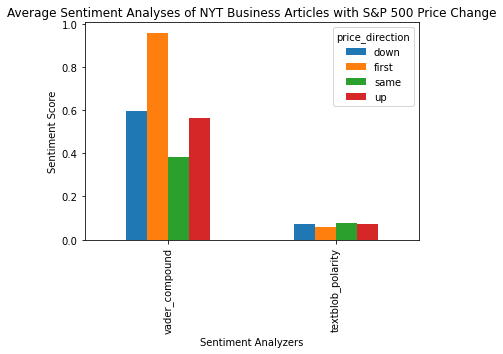

In [137]:
daily.groupby('price_direction')['vader_compound','textblob_polarity'].mean().T.plot(kind='bar', stacked=False)
plt.title('Average Sentiment Analyses of NYT Business Articles with S&P 500 Price Change')
plt.xlabel('Sentiment Analyzers')
plt.ylabel('Sentiment Score');

### Text Cleaning
eliminate the punctuation, URL, and @
#source: https://monkeylearn.com/blog/text-cleaning/

In [156]:
#Use this to remove http, punctuation, URL, and @
daily['text'] = daily['text'].map(lambda x: re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", str(x)))


tokenize and lemmatize
(no longer lemmatizing, results from gridsearch showed superior accuracy without lemmatizing)

In [139]:

# import string

# lemmatizer = WordNetLemmatizer()
# tokenizer = RegexpTokenizer(r'\w+|\$[\d\.]+|\S+')

# #removing additional 
# def tokelemma(z):
#     z = str(z).lower().translate(str.maketrans('','','1234567890')).translate(str.maketrans('','',string.punctuation))
#     #credit to DrChuck https://stackoverflow.com/questions/23175809/str-translate-gives-typeerror-translate-takes-one-argument-2-given-worked-i
#     toke = tokenizer.tokenize(z.lower())
#     toke = ' '.join([w for w in toke])
#     return toke

#     #lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in toke])
#     #return lemmatized_output
# daily['text'] = daily['text'].map(tokelemma)

# #has to ha lemmatizer issue with exceptions https://stackoverflow.com/questions/33594721/why-nltk-lemmatization-has-wrong-output-even-if-verb-exc-has-added-right-value

# Train Test Split

In [157]:
daily.head(1)

,Unnamed: 0,date,text,price,pct_change,price_direction,day_of_week,is_holiday,vader_compound,textblob_polarity
0,0,2011-07-29,Drug App Comes Free Ads Included Epocrates has...,1292.28,NaN,first,4,0,0.9591,0.056552


In [158]:
daily['price_direction'].value_counts()

up       1391
down     1137
same     1124
first       1
Name: price_direction, dtype: int64

In [159]:
#prep columns to numerical
daily.dropna(inplace=True)
daily['price_direction'] = daily['price_direction'].map({'down' : -1,'same' : 0 , 'up' : 1})

In [143]:
#declaring features and target variable for tfidf/countvectorization. They will not take an array as the X
X = daily['text']
y = daily['price_direction']

#sticking with a test size of 0.20 to save 2 years of data to test on
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=False)

In [144]:
X

1       global concern over u debt ceiling disagreemen...
2       deal may avert default but some ask is that go...
3       charging a premium for movie at a cost highpri...
4       pearl finer but still cheap flow from china ch...
5       aaa rating is a rarity in business hanging ove...
                              ...                        
3648    way to tame airline nightmare thousand of pass...
3649    like choosing a pope how succession got messy ...
3650    now going viral meeting online friend in real ...
3651    japan economy return to growth but virus threa...
3652    day may be numbered for the world oldest bank ...
Name: text, Length: 3652, dtype: object

### CountVectorizer

In [145]:
cvec = CountVectorizer(stop_words='english',ngram_range=(1,2))
Xc_train = cvec.fit_transform(X_train)
Xc_test = cvec.transform(X_test)

In [146]:
#processing CV on main dataframe
cvec = CountVectorizer(ngram_range=(1,2))
text_fields = pd.DataFrame(Xc_train.todense(), columns = cvec.get_feature_names())
df = text_fields.join(daily, how='outer',lsuffix= '_')
df.head(3)


#dropping text series after vectorizing
#daily.drop(columns = ['text'], inplace=True, axis =1)

NotFittedError: Vocabulary not fitted or provided

In [ ]:
# plot top occuring words
Xc_train_df = pd.DataFrame(Xc_train.todense(), columns=cvec.get_feature_names())
Xc_train_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh');
#wa and ha are was and has. may need to eliminate these with manual stopword removal

In [ ]:
#further data cleaning before modeling with all features
stop
daily.set_index('date', inplace=True)
daily.drop(columns=['Unnamed: 0'], inplace=True)

#### CV Grid search with MNB

In [127]:
cvec = CountVectorizer() #trying while keeping stopwords
#cvec = CountVectorizer(stop_words = 'english')
Xc_train = cvec.fit_transform(X_train)
Xc_test = cvec.transform(X_test)


'''
#To add custom stop words
my_words = ['spoon', 'mustard', 'gucci', 'circle jerk', 'tortuga']

stop_words = text.ENGLISH_STOP_WORDS.union(my_words)
CountVectorizer(stopwords = stopwords)'''

# Pipeline with two stages:
# 1. CountVectorizer (transformer)
# 2. Multinomial Naive Bayes (estimator)

pipe = Pipeline([
    ('cvec', CountVectorizer() ),
    ('nb', MultinomialNB())
])

# Hyperparameters:
# Maximum number of features fit: 2000, 3000, 4000, 5000
# Minimum number of documents needed to include token: 2, 3
# Maximum number of documents needed to include token: 90%, 95%
# Check (individual tokens) and also check (individual tokens and 2-grams).

pipe_params = {
    'cvec__max_features': [1000, 2000, 4000, 5000],
    'cvec__min_df': [2,3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)]
}

# Instantiate GridSearchCV.

gs = GridSearchCV(pipe, pipe_params, cv =3) 
gs.fit(X_train, y_train)

# What's the best score?

gs.score(X_train, y_train), gs.score(X_test, y_test)
%time

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
gs.best_params_

In [ ]:
# predictions
preds = gs.predict(X_test)

# View confusion matrix
plot_confusion_matrix(gs, X_test, y_test, cmap='Blues');


In [ ]:
accuracy_score(y_test, preds, sample_weight=None)

## TFIDF

Less likely to use tFIDF since it is looking for relative and rare words across documents to weight them in comparison and that isn't necessarily the goal of our analysis. Weighting words is less important than finding sentiment from counting words.

Text(0, 0.5, 'Words')

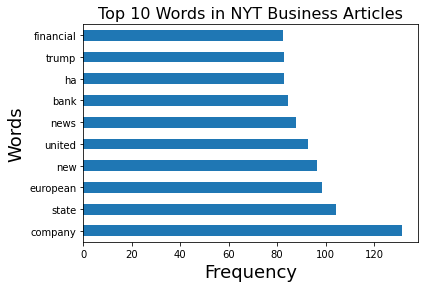

In [147]:
# plot top occuring words
tvec = TfidfVectorizer(stop_words='english')
X_train_df = pd.DataFrame(tvec.fit_transform(X_train).todense(), 
                          columns=tvec.get_feature_names())
X_train_df.sum().sort_values(ascending=False).head(10).plot(kind='barh');
plt.title('Top 10 Words in NYT Business Articles', fontsize=16)
plt.xlabel('Frequency', fontsize=18)
plt.ylabel('Words', fontsize=18)

In [148]:
# Set up a pipeline with tf-idf vectorizer and multinomial naive bayes

pipe_tvec = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB() )
])

# Search over the following values of hyperparameters:
# Maximum number of features fit: 2000, 3000, 4000, 5000
# No stop words and english stop words
# Check (individual tokens) and also check (individual tokens and 2-grams).


pipe_tvec_params = {
    'tvec__max_features': [1000, 2000, 4000],
    'tvec__stop_words': [None, 'english'],
    'tvec__ngram_range': [(1,1), (1,2)],
    'tvec__sublinear_tf': [True],
    'nb__alpha': [1,2]
}

# Instantiate GridSearchCV.
gs_2 = GridSearchCV(pipe_tvec, pipe_tvec_params, cv = 3)
gs_2.fit(X_train, y_train)
gs_2.score(X_train, y_train), gs_2.score(X_test, y_test)
%time

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 4.77 µs


In [149]:
gs_2.best_params_

{'nb__alpha': 2,
 'tvec__max_features': 1000,
 'tvec__ngram_range': (1, 1),
 'tvec__stop_words': None,
 'tvec__sublinear_tf': True}

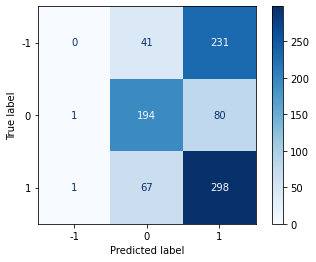

In [150]:
# Get predictions
preds_tvec = gs_2.predict(X_test)
# View confusion matrix
plot_confusion_matrix(gs_2, X_test, y_test, cmap='Blues');


In [151]:
accuracy_score(y_test, preds_tvec, sample_weight=None)

0.5388828039430449

## Evaluation of Models

#### With lemmatization

TFIDF
{'tvec__max_features': 4000,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': None}
 
 {'tvec__max_features': 2000,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': None,
 'tvec__sublinear_tf': True}
 
CVEC
 {'cvec__max_df': 0.9,
 'cvec__max_features': 4000,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 2)}
 
accuracy score with TFIDF and multinomial bayes:  52.4%
accuracy score with CVEC and multinomial bayes: 44.2%
 
 
 
 
#### Non-lemmatized
 
 
 
 {'tvec__max_features': 2000,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': None,
 'tvec__sublinear_tf': True}
accuracy score with TFIDF and multinomial bayes:  52.13%


{'nb__alpha': 1,
 'tvec__max_features': 1000,
 'tvec__ngram_range': (1, 1),
 'tvec__sublinear_tf': True}
 
accuracy score with TFIDF and multinomial bayes:  54.22%

{'nb__alpha': 1,
 'tvec__max_features': 1000,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': 'english',
 'tvec__sublinear_tf': True}
 accuracy score with TFIDF and multinomial bayes:  47.10%

